<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/Iron_Ore_Froth_Flotation_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Quality Prediction of Iron Ore Mining Flotation Process**

####**What is Froth Flotation Process**

Froth flotation is an important concentration process. This process can be used to separate any two different particles and operated by the surface chemistry of the particles. In flotation, bubbles are introduced into a pulp and the bubbles rise through the pulp. In the process, hydrophobic particles become bound to the surface of the bubbles. The driving force for this attachment is the change in the surface free energy when the attachment occurs. These bubbles rise through the slurry and are collected from the surface. To enable these particles to attach, careful consideration of the chemistry of the pulp needs to be made.

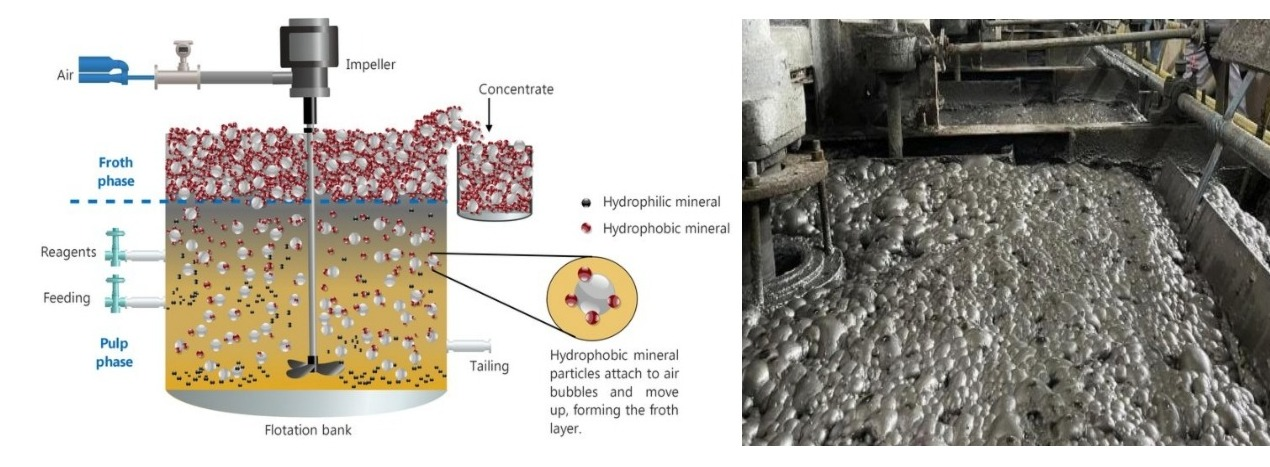

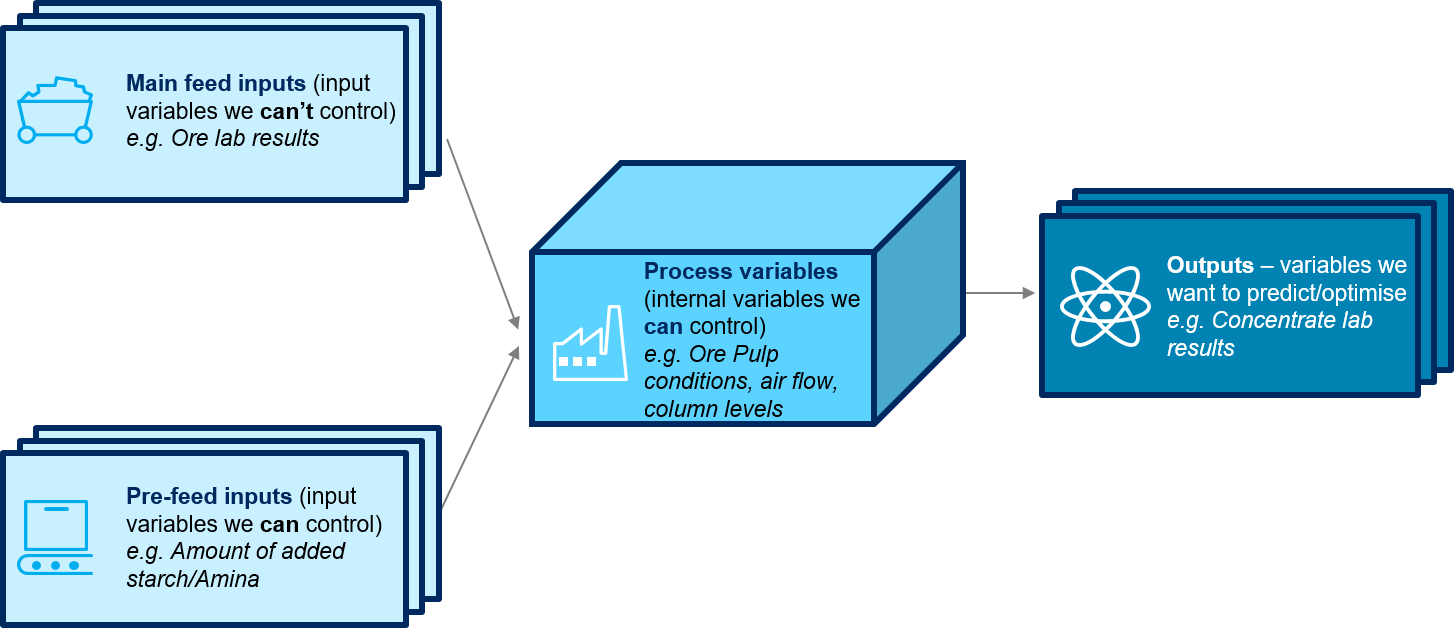

**Data Definitions**:

- **Date**: Data collection time.
- **% Iron Feed**: Feed grade of iron-containing ore.
- **% Silica Feed**: Feed grade of silica-containing ore.
- **Starch Flow**: Depressant chemical for Iron(Fe) containing ore measured in m³/h.
- **Amina Flow**: Collector chemical for Silica containing ore measured in m³/h.
- **Ore Pulp Flow**: The amount of pulp flow fed to the flotation columns as the product of the previous process step measured in t/h.
- **Ore Pulp pH**: pH is measured in pH scale.
- **Ore Pulp Density**: The solid percent of ore fed density ranges in kg/cm³
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Air Flow**: Air Flows that goes into the flotation cell measured in Nm³/h.
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Level**: Froth level in the flotation cell measured in mm.
- **% Iron Concentrate**: Concentrate grade of iron-containing ore in percentage.
- **% Silica Concentrate**: Concentrate grade of silica-containing ore in percentage

####**What are we looking for?**

- Can we accurately predict Silica Concentrate, so we can have a chance to act on it before lab tests come back?
- What are the most important variables and how do they influence the level of Silica Concentrate?
- What values should we choose for controllable variables?
- Is it possible to predict % Silica in Concentrate whitout using % Iron Concentrate column?
- What is the impact we can expect?

####**Import Libraries and Modules**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

####**Import Dataset**

In [33]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Flotation/

raw_data = pd.read_csv('Flotation_Plant.csv', sep= ',', decimal = ',')
raw_data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Flotation


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [5]:
raw_data.shape

(737453, 24)

In [6]:
df_datatype = pd.concat([raw_data.dtypes, raw_data.nunique(),
                         round(raw_data.nunique()*100/len(raw_data), 2),
                         raw_data.isnull().sum(),
                         round(raw_data.isnull().sum()*100/len(raw_data),2)],
                        axis=1)

df_datatype.columns = ['data type',
                       'No. of categories',
                       'No. of categories %',
                       'missing values',
                       'missing values %']

df_datatype.sort_values(by='missing values %',
                        ascending=False, inplace=True)
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
date,object,4097,0.56,0,0.0
% Iron Feed,float64,278,0.04,0,0.0
% Iron Concentrate,float64,38696,5.25,0,0.0
Flotation Column 07 Level,float64,295667,40.09,0,0.0
Flotation Column 06 Level,float64,301502,40.88,0,0.0
Flotation Column 05 Level,float64,276051,37.43,0,0.0
Flotation Column 04 Level,float64,309264,41.94,0,0.0
Flotation Column 03 Level,float64,322315,43.71,0,0.0
Flotation Column 02 Level,float64,331189,44.91,0,0.0
Flotation Column 01 Level,float64,299573,40.62,0,0.0


- looks like we do not have missing values across the dataframe

In [7]:
#checking if there are any duplicate rows
duplicate_rows = raw_data[raw_data.duplicated()]
duplicate_rows.shape

(1171, 24)

In [8]:
#dropping date column since it is not important while predicting the % Silica Concentrate
cols_to_drop = ('date')
df = raw_data.drop(columns = cols_to_drop)
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [9]:
df.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [10]:
#check duplicated rows
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(1171, 23)

In [11]:
#drop duplicated rows
df = df.drop_duplicates()
df.shape

(736282, 23)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
% Iron Feed,736282.0,56.298307,5.160365,42.740000,52.670000,56.08000,59.72000,65.78000
% Silica Feed,736282.0,14.648984,6.810741,1.310000,8.940000,13.85000,19.60000,33.40000
Starch Flow,736282.0,2869.636615,1216.017896,0.002026,2075.070000,3020.23000,3728.93000,6300.23000
Amina Flow,736282.0,488.165523,91.254428,241.669000,431.835848,504.35250,553.33575,739.53800
Ore Pulp Flow,736282.0,397.570736,9.705444,376.249000,394.248000,399.23800,402.96700,418.64100
Ore Pulp pH,736282.0,9.767315,0.387176,8.753340,9.527050,9.79746,10.03780,10.80810
Ore Pulp Density,736282.0,1.680424,0.069206,1.519820,1.647390,1.69758,1.72838,1.85325
Flotation Column 01 Air Flow,736282.0,280.119813,29.633831,175.510000,250.278000,299.34100,300.14700,373.87100
Flotation Column 02 Air Flow,736282.0,277.121249,30.157126,175.156000,250.448000,296.20200,300.68600,375.99200
Flotation Column 03 Air Flow,736282.0,281.052538,28.571077,176.469000,250.847000,298.69000,300.38500,364.34600


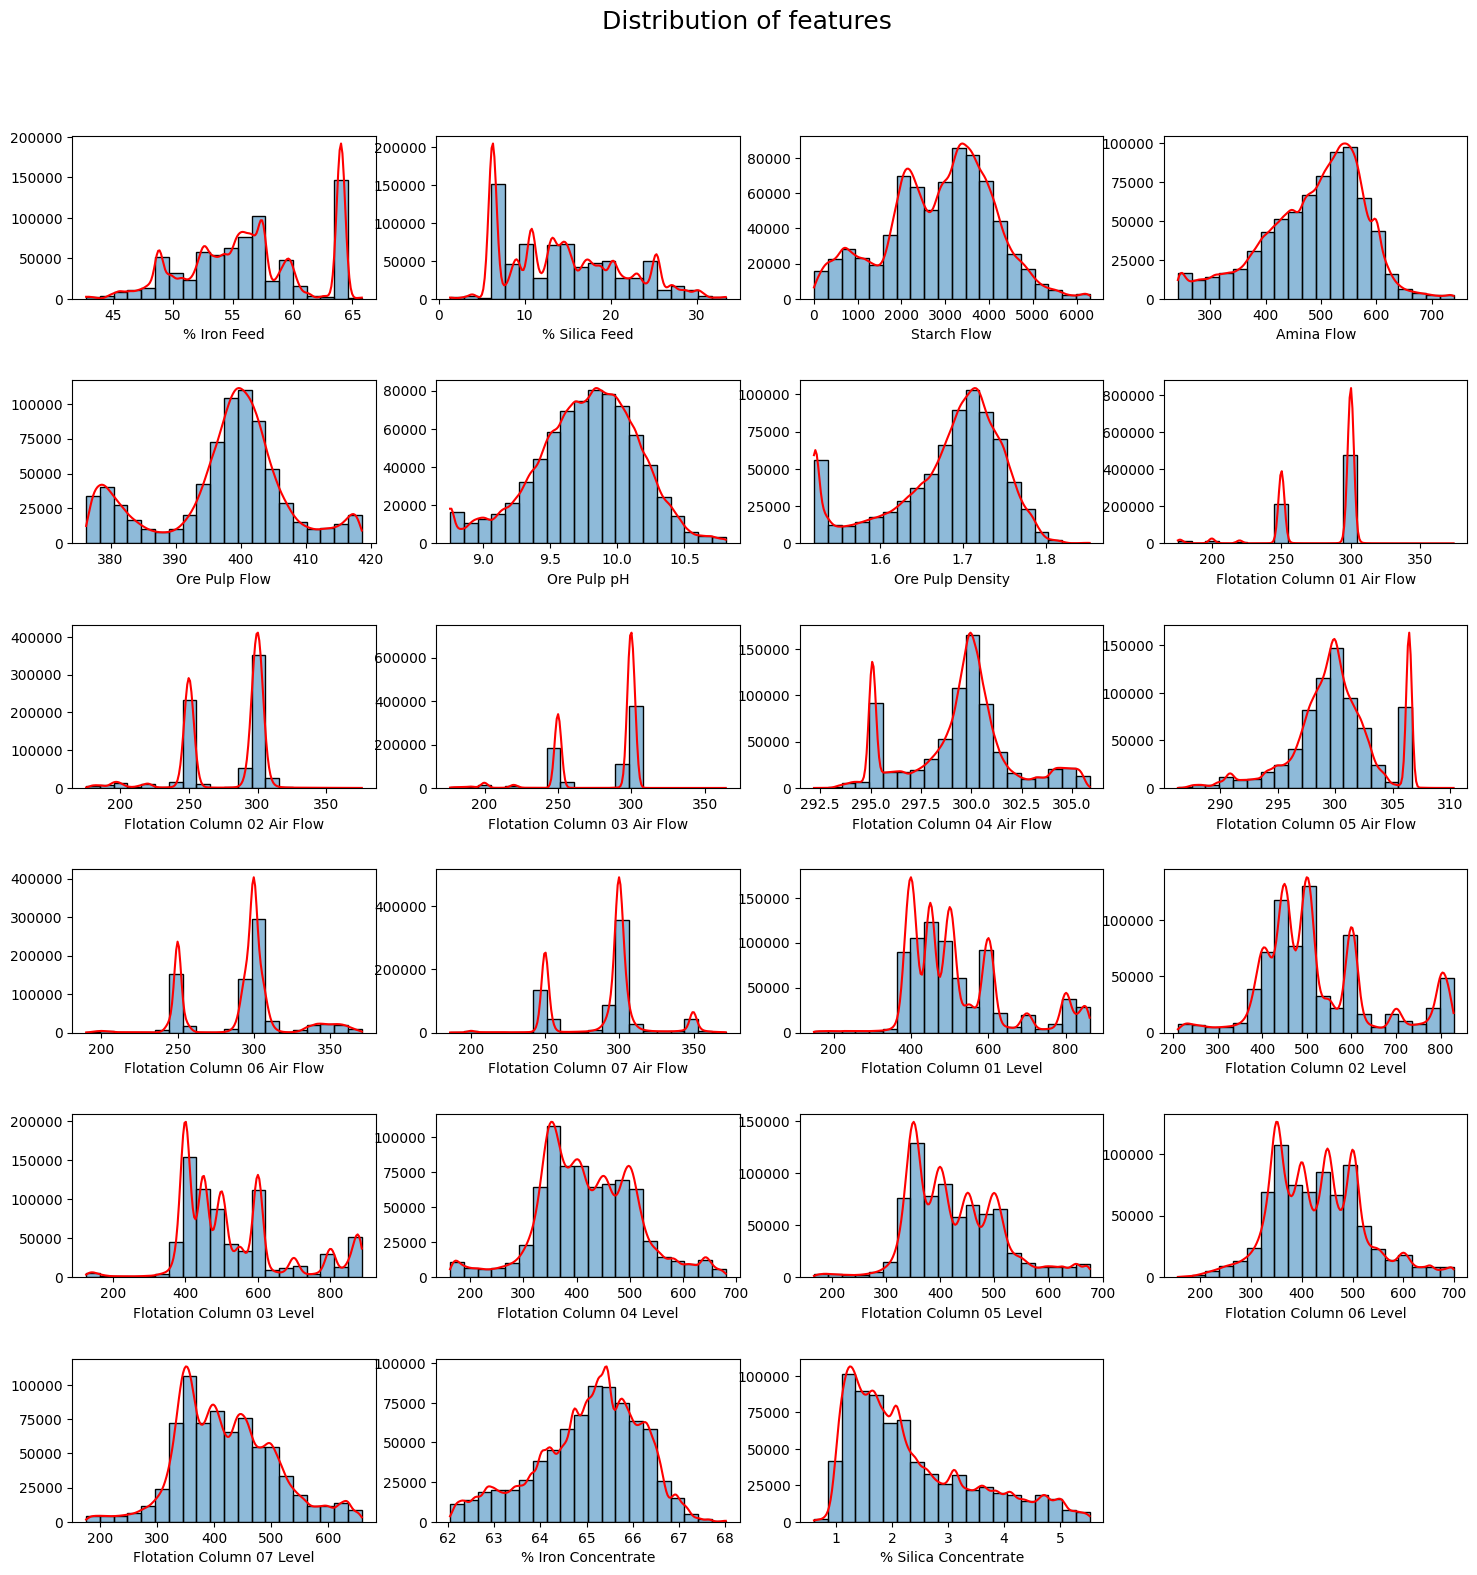

In [20]:
features = df.columns
plt.figure(figsize= (18,18))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of features", fontsize=18, y=0.95)
for i, feature in enumerate(features):
 k = i + 1
 plt.subplot(6,4,int(k))
 sns.histplot(data = df, x= feature,kde=True, bins = 20).lines[0].set_color('red')
 plt.xlabel(feature)
 plt.ylabel("")
plt.show()

<Axes: >

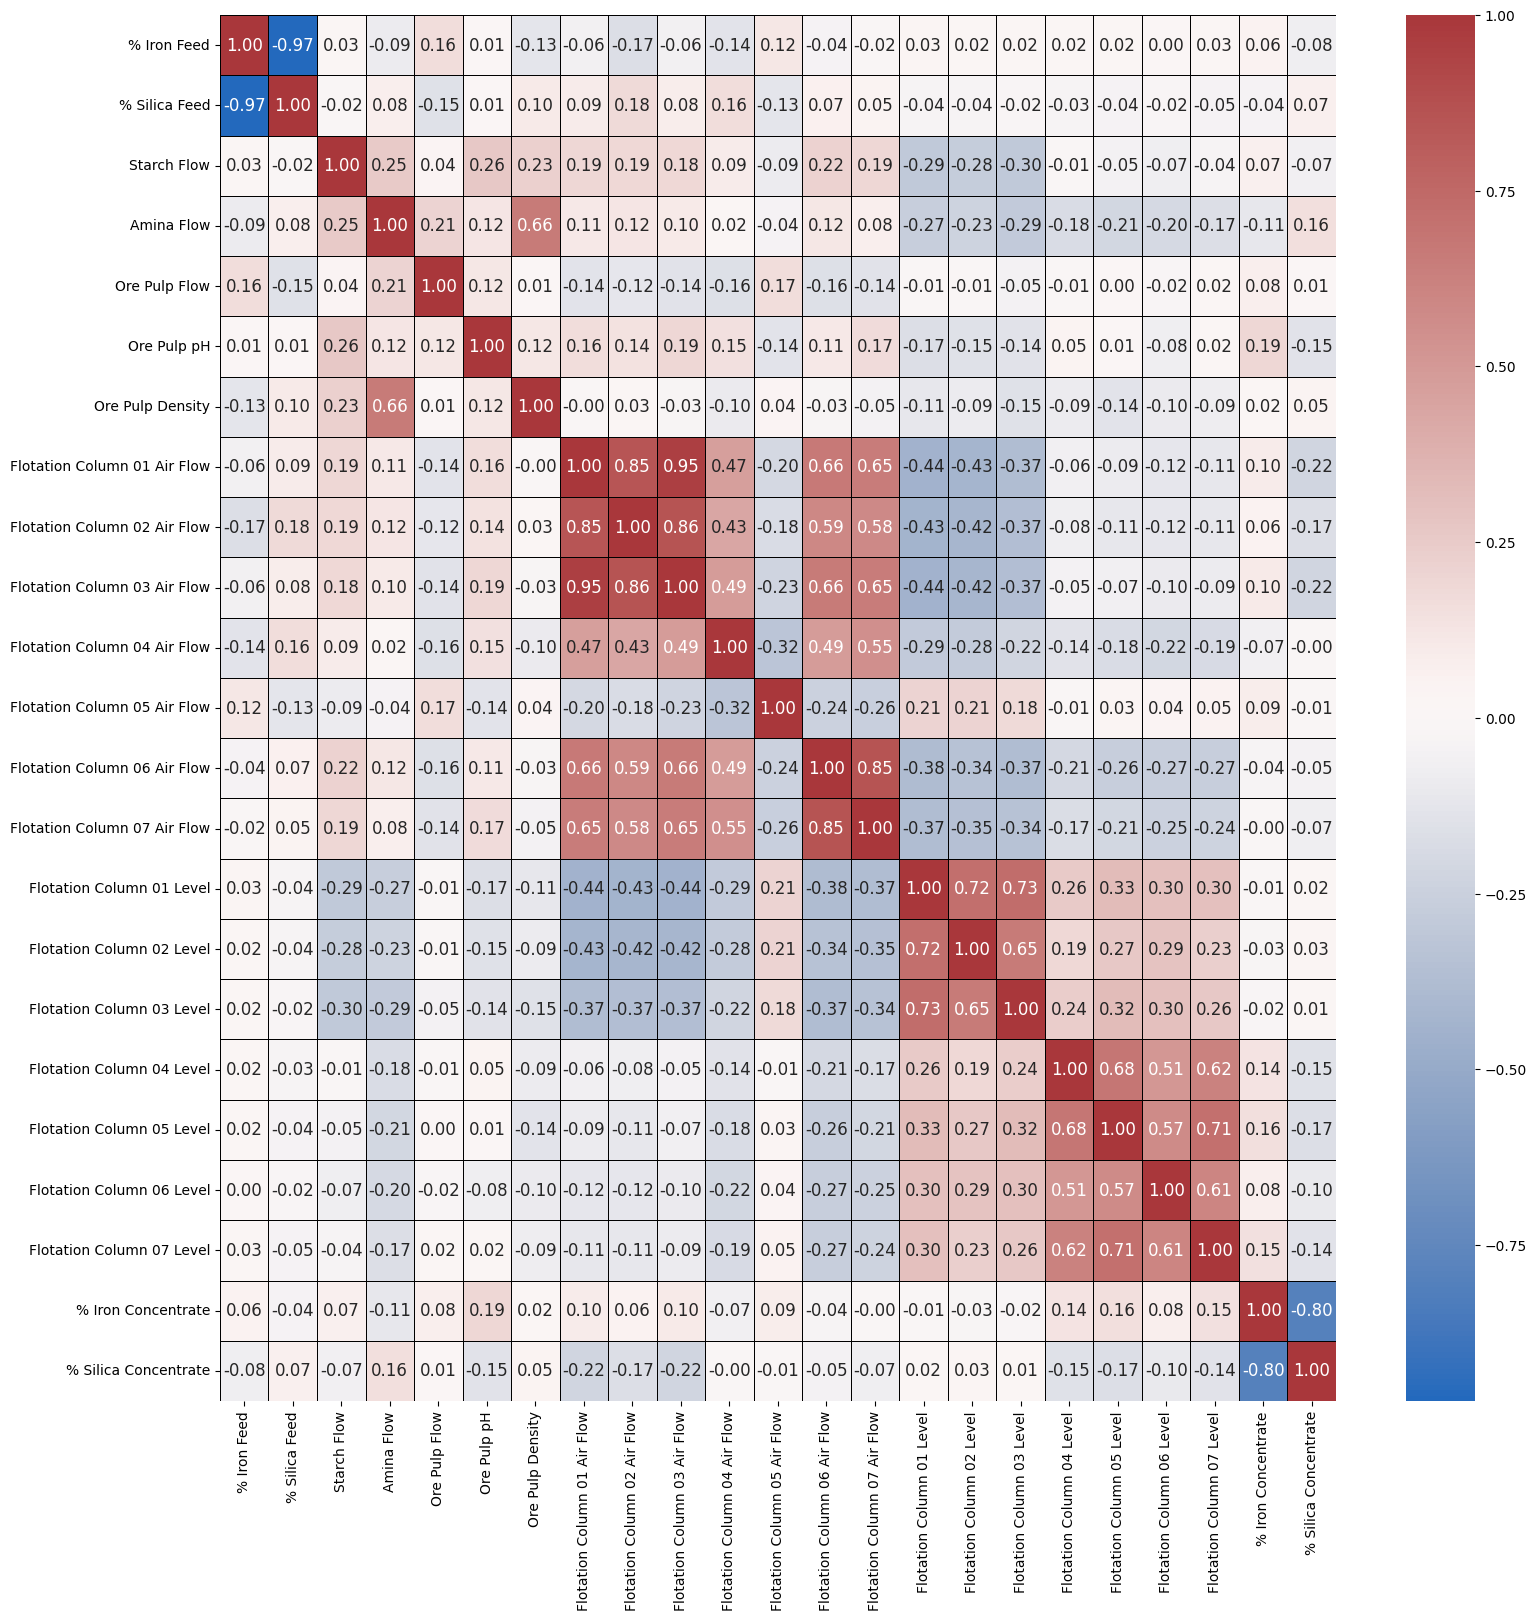

In [30]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='vlag', annot_kws={"fontsize": 12}, linewidths=0.6, linecolor='black')

In [34]:
%cd /content/drive/My Drive/Flotation/
feed = pd.read_csv('feed.csv')
feed.head()

/content/drive/My Drive/Flotation


,Unnamed: 0,X1,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Iron Concentrate,% Silica Concentrate
0,1,0.0,2017-03-10 01:02:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,66.493242,1.31
1,2,1.0,2017-03-10 01:02:20,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,66.853733,1.31
2,3,2.0,2017-03-10 01:02:40,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,64.773804,1.31
3,4,3.0,2017-03-10 01:03:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,68.550271,1.31
4,5,4.0,2017-03-10 01:03:20,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,65.116564,1.31


In [35]:
feed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589962 entries, 0 to 589961
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            589962 non-null  int64  
 1   X1                    589962 non-null  float64
 2   date                  589962 non-null  object 
 3   % Iron Feed           589962 non-null  float64
 4   % Silica Feed         589962 non-null  float64
 5   Starch Flow           589962 non-null  float64
 6   Amina Flow            589962 non-null  float64
 7   Ore Pulp Flow         589962 non-null  float64
 8   Ore Pulp pH           589962 non-null  float64
 9   Ore Pulp Density      589962 non-null  float64
 10  % Iron Concentrate    589962 non-null  float64
 11  % Silica Concentrate  589962 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 54.0+ MB


In [37]:
%cd /content/drive/My Drive/Flotation/
flotation = pd.read_csv('flotation.csv')
flotation.head()

/content/drive/My Drive/Flotation


,Unnamed: 0,X1,date,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,1,0.0,2017-03-10 01:02:00,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344
1,2,1.0,2017-03-10 01:02:20,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075
2,3,2.0,2017-03-10 01:02:40,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567
3,4,3.0,2017-03-10 01:03:00,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669
4,5,4.0,2017-03-10 01:03:20,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679


<ipython-input-54-b900e8ca4f16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = raw_data.corr()


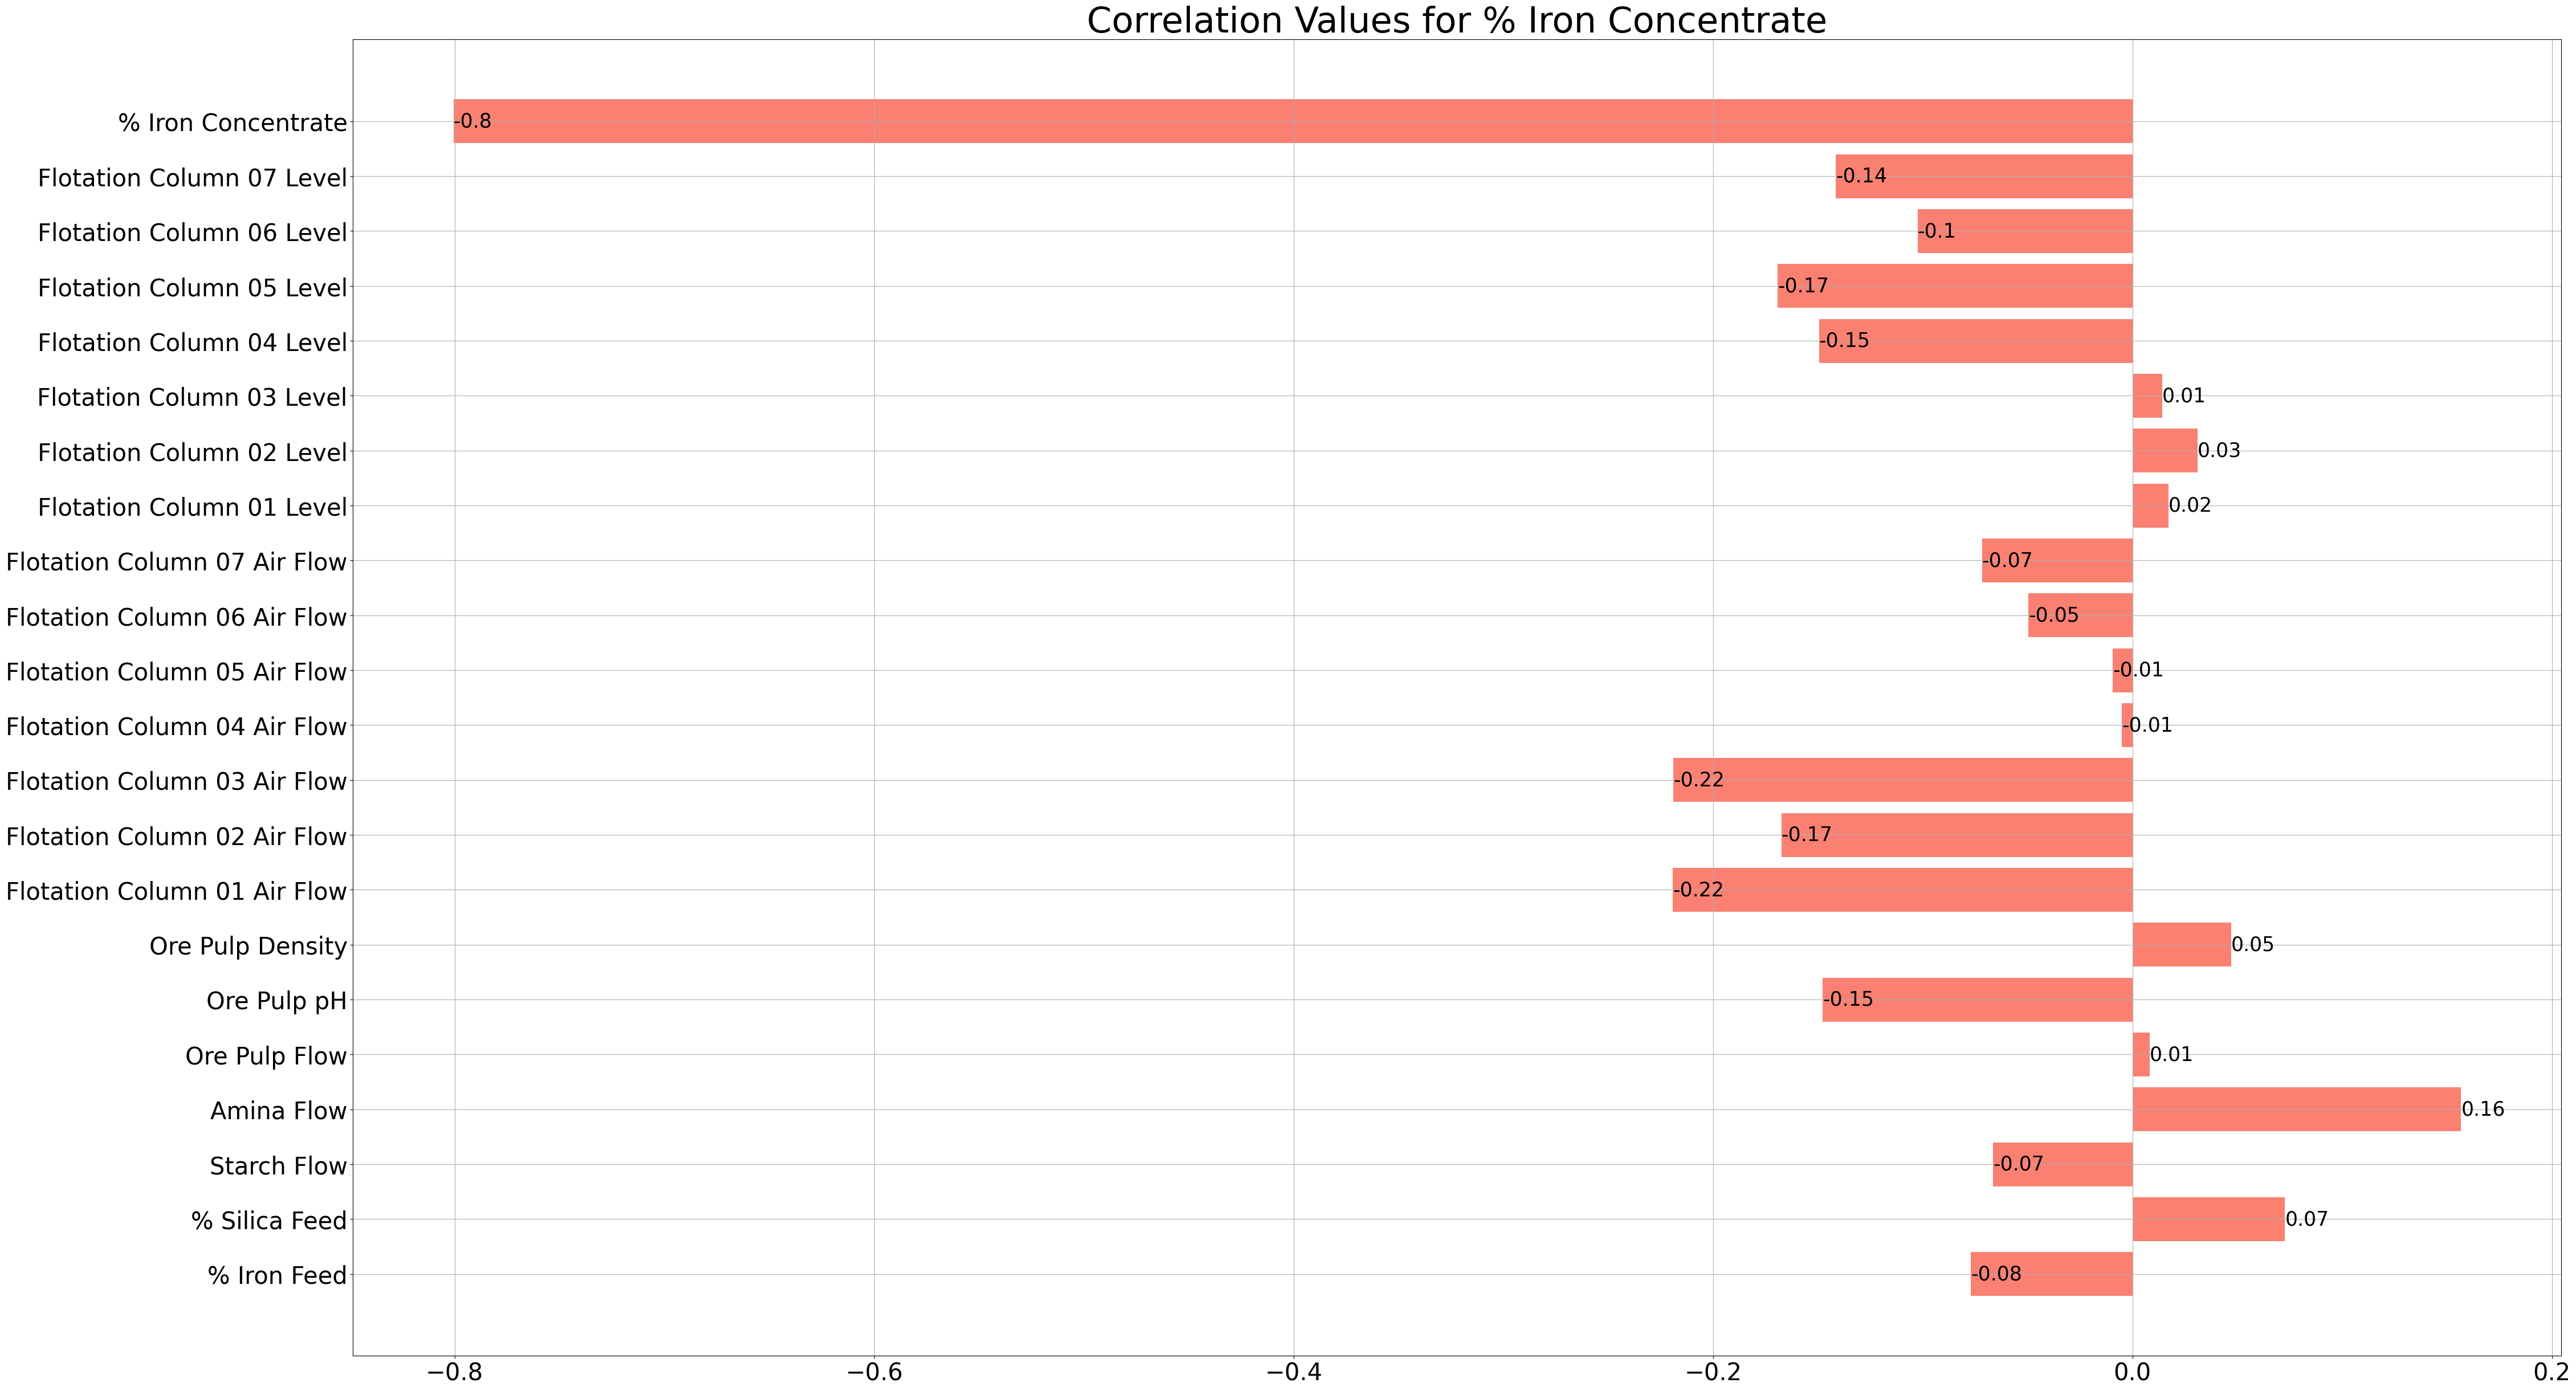

In [54]:
corr_matrix = raw_data.corr()
df_corr = pd.DataFrame(corr_matrix)

corr_values = np.array(df_corr.iloc[22])  # Drop IRON
corr_values = corr_values[0:len(corr_values)-1]

corr_names = np.array(df_corr.columns)
corr_names = corr_names[0:len(corr_names)-1]  # Drop iron

plt.figure(figsize=(50, 30))
plt.barh(corr_names, corr_values, color="salmon")
plt.title("Correlation Values for % Iron Concentrate", fontsize=45)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Add values to the bars
for i, value in enumerate(corr_values):
    plt.text(value, i, str(round(value, 2)), fontsize=25, va='center')

plt.grid(True)
plt.show()

**Resampling**

The dataset source specifies that there are variables measured every 1 minute and others (silica and iron concentration) that are measured approximately every 1 hour.

Our resampling considers an average of the samples taken every 1 minute to generate new data, this data is stored in a new dataset.

In [55]:
#resampling with mean 

names = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate']
 
 
ts = 175
for x in range(1,raw_data.shape[1]):
  data = [] #clear data 
  n = 0 #set counter
 
  while n*ts <= round(raw_data.shape[0]):
    sample_mean_value = raw_data.iloc[(ts*n):(ts*(n+1)),x].mean()  #sampling data and save mean of n*ts elements
    data += [sample_mean_value]   #save sampling into a list
    data_array = np.array(data)   #list to array
    data_array= np.transpose(data_array)  #transpose
    df = pd.DataFrame(data_array)   #array to dataframe
    n += 1  #counter up 
 
  if x == 1:
    df_first = df
  if x == 2:
    new_df = pd.concat([df_first, df], axis = 1)
  if x > 2: 
    new_df = pd.concat([new_df, df], axis=1) 
 
new_df.columns = names

In [39]:
new_df.to_csv('resampling_data.csv')

In [40]:
#remove output %Silica concentrate for post ML analysis 
new_df = new_df.drop(labels=[ '% Silica Concentrate'], axis = 1)

In [42]:
from sklearn.preprocessing import MinMaxScaler

names = new_df.columns #store the names

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

scaled_df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
0,0.540799,0.488314,0.498298,0.679409,0.531546,0.662302,0.672661,0.534455,0.546973,0.563565,...,0.336791,0.333774,0.405237,0.368564,0.421204,0.555617,0.549710,0.520776,0.565210,0.836645
1,0.540799,0.488314,0.492556,0.594243,0.557929,0.670478,0.472487,0.525605,0.547577,0.562654,...,0.328628,0.331759,0.403518,0.373570,0.420896,0.557340,0.534350,0.501481,0.564074,0.862401
2,0.540799,0.488314,0.550250,0.705649,0.533854,0.633270,0.682605,0.528449,0.546331,0.562794,...,0.331112,0.335917,0.404686,0.373501,0.422205,0.557629,0.540272,0.511463,0.566691,0.847214
3,0.540799,0.488314,0.510646,0.705103,0.555560,0.571118,0.672178,0.526894,0.545742,0.562816,...,0.327775,0.333298,0.449855,0.431623,0.460376,0.630150,0.616980,0.586955,0.644354,0.810821
4,0.540799,0.488314,0.524648,0.761525,0.555472,0.488005,0.786729,0.526111,0.546126,0.562897,...,0.330728,0.332819,0.548941,0.539122,0.553435,0.751067,0.744888,0.716458,0.777508,0.789802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210,0.304253,0.682144,0.652430,0.545024,0.100191,0.325171,0.576525,0.880798,0.923980,0.946566,...,0.935362,0.680666,0.330775,0.456572,0.355272,0.457908,0.636600,0.388139,0.456583,0.470908
4211,0.304253,0.682144,0.446214,0.554519,0.103908,0.503971,0.693113,0.879544,0.922271,0.946240,...,0.940639,0.710383,0.332340,0.455370,0.470214,0.460225,0.642659,0.393828,0.465853,0.383773
4212,0.304253,0.682144,0.501692,0.502586,0.089459,0.498256,0.628580,0.882168,0.921560,0.946706,...,0.943290,0.704928,0.330926,0.452947,0.940659,0.457371,0.645466,0.391506,0.455490,0.377182
4213,0.304253,0.682144,0.581988,0.440233,0.096470,0.438531,0.475364,0.878992,0.924982,0.945907,...,0.939979,0.772362,0.331557,0.457042,0.978481,0.455263,0.640652,0.389809,0.453472,0.380596


Now data it's normalized

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [57]:
flotation_df = scaled_df  #change the name... 
X = flotation_df.drop(['% Iron Concentrate'], axis=1) #drop target 
y = flotation_df['% Iron Concentrate']  #select target 

#make split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [60]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Disable FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

para_grids = {
    "n_estimators": [10, 50, 100, 200],
    "max_features": ["auto", "log2", "sqrt"],
    "bootstrap": [True, False]
}

scores = ['precision', 'recall']

best_params = {}  # Store the best parameters for each score

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    estimator = RandomForestRegressor(max_features='auto')  # Set max_features explicitly
    clf = GridSearchCV(estimator, para_grids)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print()

    best_params[score] = clf.best_params_

# Access the best parameters for each score
print("Best parameters for precision:", best_params['precision'])
print("Best parameters for recall:", best_params['recall'])


# Tuning hyper-parameters for precision

Best parameters set found on development set:
{'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 200}

# Tuning hyper-parameters for recall

Best parameters set found on development set:
{'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 200}

Best parameters for precision: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 200}
Best parameters for recall: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 200}


In [63]:
model = RandomForestRegressor(n_estimators=200, max_features='sqrt', bootstrap = False) #we use the previous parameters

In [64]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=200)

In [65]:
model.score(X_test,y_test)

0.4073594900443719

In [66]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator= model, X=X_train, y=y_train, cv=5)

In [67]:
print(all_accuracies.std())

0.006445772062546486


The result is: 0.00644 which is 0.645%. This is extremely low, which means that our model has a very low variance, which is actually very good since that means that the prediction that we obtained on one test set is not by "chance"

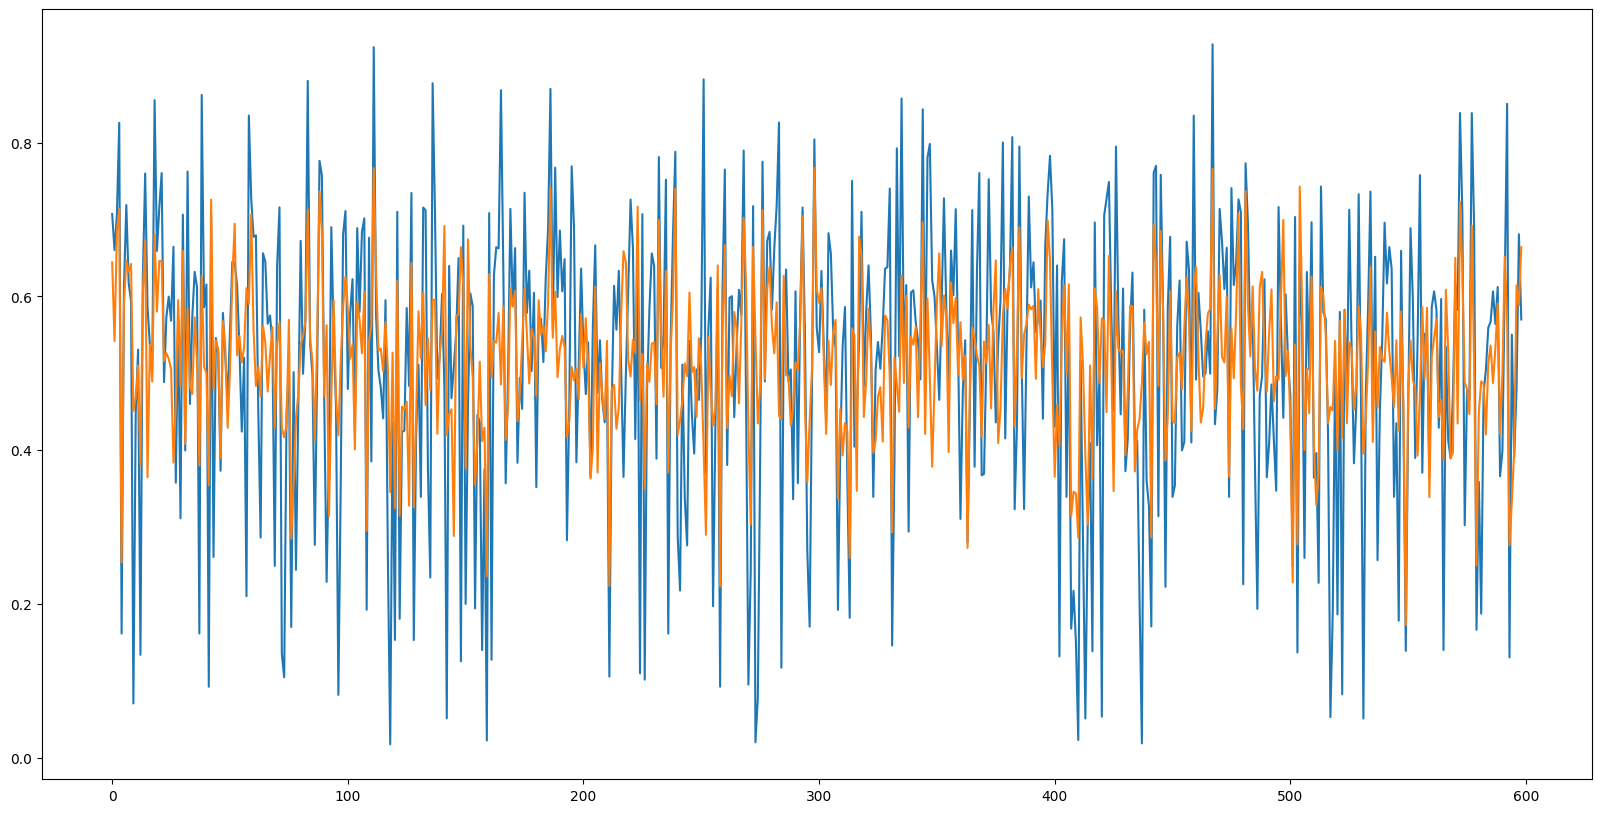

In [68]:
#Plot Predict Values vs Real Values
pred = model.predict(X_test)
plt.figure(figsize=(20, 10))
plt.plot(y_test.values[1:600]) #Just some data
plt.plot(pred[1:600])
plt.show()